<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_25_Distribuci%C3%B3n_F_de_Fisher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Simular variables aleatorias relacionadas con distribuciones F de Fisher, visualizar densidad y calcualr probabildiades.


# Fundamento Teórico

La distribución F de Fisher, también conocida como la distribución F o la distribución de Fisher-Snedecor, es una distribución de probabilidad que surge frecuentemente en análisis de varianza (ANOVA), entre otras técnicas estadísticas. Se utiliza principalmente para comparar varianzas y es esencial en el contexto de pruebas de hipótesis que involucran modelos estadísticos.

Cuando se toman muestras aleatorias simples independientes de tamaños $m$ y $n$  de dos poblaciones normales con varianzas iguales, la distribución muestral toma un comportamiento de distribución de *F de Fisher Snedecor*:

$$
\frac{S^2_1}{S^2_2}
$$

con $m -1$ grados de libertad en el numerador y $n - 1$ grados de libertad en el denominador.

Las muestras tienen diferentes grados de libertad. Además, los valores de la variable aleatoria $x$ no puede tener valores negativos, es decir $f(x ≥ 0)$ y es asimétrica. [Anderson, Sweeney, & Williams, 2008].

El comportamiento de las distribuciones *Fisher* depende absolutamente del valor de la variable aleatoria $x$ y esencialmente del valor de los grados de libertad $gl1$ y $gl2$ de dos muestras. Este valor de los grados de libertad debe ser mayor que cero.


### Características

* No negatividad: Los valores de una variable aleatoria F siempre son no negativos.
* Asimetría: La distribución F es asimétrica y sesgada hacia la derecha, especialmente cuando los grados de libertad del denominador son bajos.
* Relación con otras distribuciones: Cuando los grados de libertad del numerador son 1, la distribución F se convierte en una distribución t cuadrado. Además, a medida que los grados de libertad del denominador tienden a infinito, la distribución F tiende a una distribución chi-cuadrado.

## Aplicaciones

Una de las grandes aplicaciones en términos estadísticos e la distribución *F de Fisher* es la prueba de hipótesis para dos varianzas de dos muestras independientes. Estas pruebas se hipótesis se abordarán en casos siguientes. Para este caso solo se aborda el aspecto de la densidad y la probabilidad acumulada.

## Densidad de una distribución F de Fisher

Fórmla para calcualr la densidad de una distribución F de Fisher:

$$
f(x; m, n) = \frac{1}{\mathrm{B}\left(\frac{m}{2}, \frac{n}{2}\right)} \left(\frac{m}{n}\right)^{\frac{m}{2}} x^{\frac{m}{2} - 1} \left(1 + \frac{m}{n} x\right)^{-\frac{m+n}{2}}
$$

Dónde:
* x es el valor de la variable aleatoria.
* m y n son los grados de libertad del numerador y del denominador, respectivamente.
* $x≥0$ y $B(p, q)$ es la función beta, que se define como:
$$
\mathrm{B}(p, q) = \int_0^1 t^{p-1} (1-t)^{q-1} \, dt = \frac{\Gamma(p) \Gamma(q)}{\Gamma(p + q)}
$$



Para calcular la función de densidad de probabilidad (PDF) de la distribución F de Fisher en Python, se puede utilizar la biblioteca *scipy.stats*, que proporciona una implementación directa y eficiente de esta y otras muchas funciones estadísticas. La distribución F tiene dos parámetros: los grados de libertad del numerador (m) y los grados de libertad del denominador (n).

Sintaxis en Python para calcular la densidad de valores de $x$
*pdf_values = f.pdf(x, dfn, dfd)*; x son los valores de la variable aleatoria y dfnm dfd son los grados de libertdad de las dos muestras.



## Probabilidad acumulada

La probabilidad acumulada al igual que otras distribuciones de variables continuas tiene que ver con extraer el área bajo la curva. En lenguaje Python se puede determinar esta área o probabilidad acumulada en una distribución F de Fisher utilizando la función df() con los argumentos de x y los grados de libertad de ambas muestras.

Para calcular la probabilidad acumulada, o la función de distribución acumulativa (CDF), de una distribución F de *Fisher en Python*, puedes usar la función *f.cdf()* de la biblioteca scipy.stats.

Esta función te permite obtener la probabilidad de que una variable aleatoria que sigue una distribución F sea menor o igual que un valor específico o un intervalo con respecto a $x$.

## Valor esperado (VE), varianza y desviación estándar


El valor esperado $(VE)$ o $E(x)$, la varianza y la desviación estándar de una distribución F de Fisher son importantes estadísticas que describen la forma y el comportamiento de esta distribución. Estas medidas dependen de los grados de libertad del numerador $(m)$ y del denominador $(n)$ de la distribución.


### Valor esperado
$$
E(X) = \frac{n}{n - 2} \quad \text{para } n > 2
$$

### Varianza

$$
\text{Var}(X) = \frac{2n^2(m + n - 2)}{m(n - 2)^2(n - 4)} \quad \text{para } n > 4
$$

### Desviación estándar

$$
\sqrt{(\text{Var}(X))}
$$




# Desarrollo



## Cargar librerías



In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.stats import f # F de Fisher

## Cargar funciones

Al igual que otros casos se preparan funciones específicas para la ejecución adecuada de este caso.



In [68]:
def f_visualizar_densidad_Fisher(x, gl1, gl2):
  # Calcula la PDF de la distribución F para esos valores
  pdf_values = f.pdf(x, gl1, gl2)

  # Gráfica la PDF
  plt.figure(figsize=(8, 5))
  plt.plot(x, pdf_values, label=f'F({gl1}, {gl2})')
  plt.title('PDF de la Distribución F de Fisher')
  plt.xlabel('Valores')
  plt.ylabel('Densidad de probabilidad')
  plt.legend()
  # plt.grid(True)
  plt.show()

# Función para calcular la media o VE, varianza y desviación estándar si es posible,
# recibe los grados de liertgdad de ambas muestras
def ve_varianza_desv_std_Fisher(x, m, n):
  # Calcula la media, varianza y desviación estándar si es posible
  if n > 2:
    VE = n / (n - 2)
    print(f"Media de F o Valor esperado({m}, {n}): {VE}")
  else:
    print("Media indefinida porque n <= 2.")

  if n > 4:
    varianza = (2 * n**2 * (m + n - 2)) / (m * (n - 2)**2 * (n - 4))
    ds = varianza**0.5
    print(f"Varianza de F({m}, {n}): {varianza}")
    print(f"Desviación estándar de F({m}, {n}): {ds}")
  else:
    print("Varianza y desviación estándar indefinidas porque n <= 4.")

  # Generar valores para x y calcular la PDF
  # x = np.linspace(0, VE + 4*ds, 1000)
  pdf_values = f.pdf(x, m, n)

  # Crear la gráfica
  gl1 = m
  gl2 = n
  plt.figure(figsize=(8, 5))
  plt.plot(x, pdf_values, label=f'PDF de Fisher Snedecor con {gl1} y {gl2} grados de libertad')
  plt.axvline(x=VE, color='red', linestyle='dashed', linewidth=2, label=f'Valor Esperado (VE):{VE}; sd:{np.round(ds, 4)}')
  plt.axvline(x=VE + ds, color='blue', linestyle='dashed', linewidth=1, label=f'VE + 1 Desviación Estándar (DS): {np.round(VE-ds, 4)}')
  plt.axvline(x=VE - ds, color='blue', linestyle='dashed', linewidth=1, label=f'VE - 1 Desviación Estándar (DS): {np.round(VE+ds, 4)}')

  # Añadir títulos y etiquetas
  plt.title(f'Distribución Fisher Snedecor con {gl1} y {gl2} grados de libertad')
  plt.xlabel('Valor')
  plt.ylabel('Densidad de probabilidad')
  plt.legend()
  plt.grid(True)
  plt.show()

def f_visualizar_area_Fisher(numeros, gl1, gl2, a, b):

  numeros = np.sort(numeros)

  # Calcula la densidad PDF para los valores de x
  pdf_values = f.pdf(numeros, gl1, gl2)

    # Calcular la probabilidad acumulada entre a y b correctamente
  probabilidad = f.cdf(b, gl1, gl2) - f.cdf(a, gl1, gl2)

  # Crear la gráfica
  plt.figure(figsize=(8, 5))
  plt.plot(numeros, pdf_values, label=f'PDF de Fisher Snedecor con {gl1} y {gl2} gl')
  plt.fill_between(numeros, pdf_values, where=(numeros >= a) & (numeros <= b), color='red', alpha=0.5,
                     label=f'Área (Probabilidad entre {a} y {b}) = {probabilidad:.4f}')

  # Añadir títulos y etiquetas
  plt.title(f'Distribución Fisher Snedecor con {gl1} y {gl2} grados de libertad')
  plt.xlabel('Valor')
  plt.ylabel('Densidad de probabilidad')
  plt.legend()
  plt.grid(True)
  plt.show()



## Generar números aleatorios


Se generan 100 números aleatorios de dos muestras difentes a 5 y 10 grados de libertdad. Se pueden generar numeros aleatorios en Python con la función *f.rvs(dfn, dfd, size=n)*



In [69]:
# Sembrar la semilla para reproducibilidad
np.random.seed(2024)

In [70]:
# Define los grados de libertad del numerador y del denominador
gl1 = 5  # Grados de libertad del numerador
gl2 = 10 # Grados de libertad del denominador

# Cantidad de números aleatorios que deseas generar
n = 100

# Generar números aleatorios de la distribución F
numeros = f.rvs(gl1, gl2, size=n)

# Mostrar algunos de los números generados
print("Números aleatorios de la distribución F de Fisher Ordenados:")
numeros = np.sort(numeros)
print(numeros)

Números aleatorios de la distribución F de Fisher Ordenados:
[0.02358416 0.12407903 0.18549031 0.22145612 0.22291837 0.26729139
 0.29440644 0.30470282 0.31449559 0.32446183 0.37222752 0.3765717
 0.37900774 0.41072583 0.42067107 0.43603069 0.43714425 0.44897711
 0.45049253 0.53138006 0.53259163 0.55339979 0.55461441 0.58483563
 0.5869639  0.59107603 0.59388185 0.61968279 0.62208282 0.6555114
 0.66422799 0.67587141 0.68428236 0.69531324 0.69975463 0.71077765
 0.73443843 0.74182899 0.74874652 0.77574971 0.77857577 0.78602172
 0.80772391 0.82105706 0.85155706 0.86626545 0.87655461 0.95745191
 0.95755174 0.9657289  0.97308355 0.97704602 0.98695232 1.02991317
 1.03611666 1.03778896 1.04366228 1.07556157 1.11034928 1.18579578
 1.1927872  1.20548875 1.23481615 1.34677521 1.35924889 1.40470355
 1.42306002 1.47317489 1.49096283 1.50059286 1.56937985 1.61113916
 1.63203624 1.66221286 1.68977538 1.74906202 1.7576115  1.87378668
 1.9114741  1.97764954 2.00814526 2.04294921 2.07419924 2.15745548
 2.

## Calcular densidad

Se calcula la densidad con la función



In [71]:
densidad = f.pdf(numeros, gl1, gl2)

# Mostrar algunos de los números generados y sus densidades
print("Algunos números aleatorios y sus densidades:")
for num, density in zip(numeros[:10], densidad[:10]):  # Solo mostrar los primeros 10
    print(f"Valor: {num:.4f}, Densidad: {density:.4f}")

Algunos números aleatorios y sus densidades:
Valor: 0.0236, Densidad: 0.0344
Valor: 0.1241, Densidad: 0.2885
Valor: 0.1855, Densidad: 0.4259
Valor: 0.2215, Densidad: 0.4916
Valor: 0.2229, Densidad: 0.4940
Valor: 0.2673, Densidad: 0.5593
Valor: 0.2944, Densidad: 0.5913
Valor: 0.3047, Densidad: 0.6021
Valor: 0.3145, Densidad: 0.6116
Valor: 0.3245, Densidad: 0.6205


## Visualizar densidad

Manar llamar la función *f_visualizar_densidad_fisher()* para visuaizar la densidad

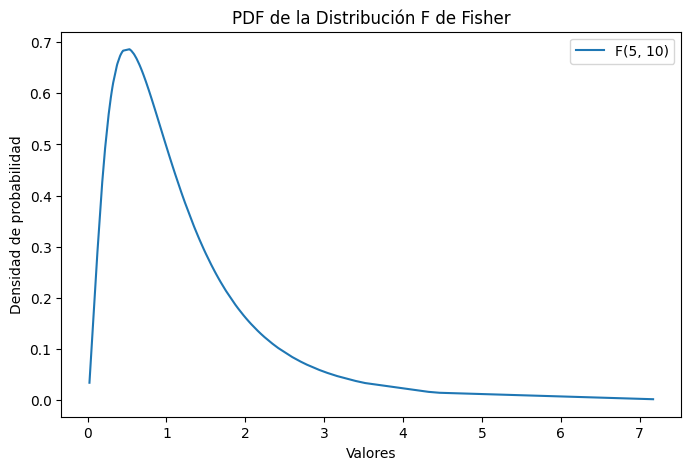

In [72]:
f_visualizar_densidad_fisher(numeros, gl1, gl2)

## Valor esperado varianza y desviación estándar



Media de F o Valor esperado(5, 10): 1.25
Varianza de F(5, 10): 1.3541666666666667
Desviación estándar de F(5, 10): 1.1636866703140785


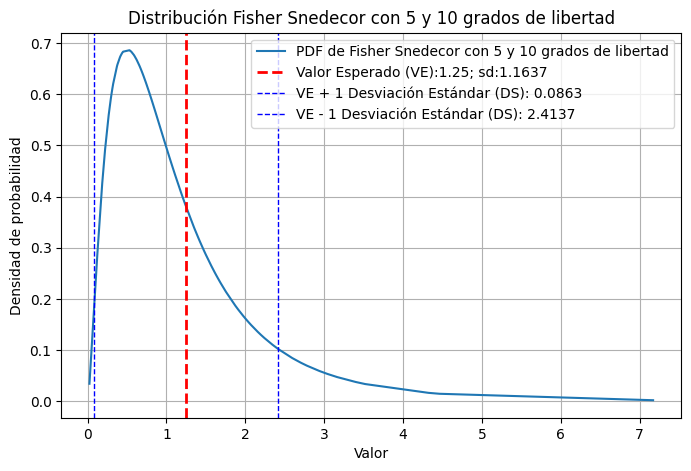

In [73]:
ve_varianza_desv_std_Fisher(numeros, gl1, gl2)

## Calcular probabilidades

## ¿Cual es la probabilida de que x sea menor que 2; $F(x \le 2)$ a $5$ y $10$ grados de libertad?

Se utiliza la función *f_visualizar_area_Fisher()*




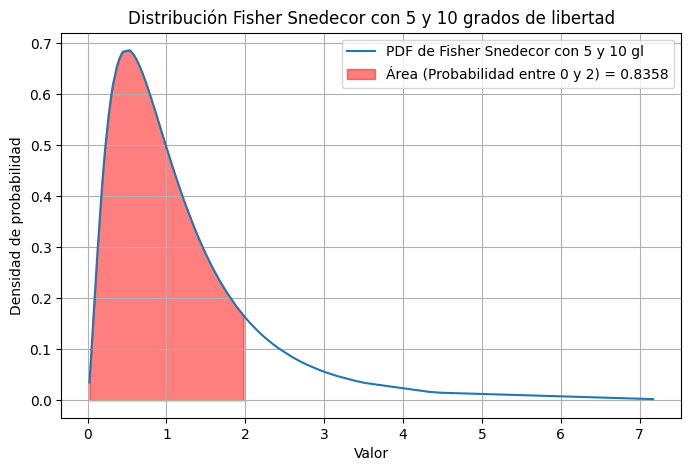

In [74]:
a = 0
b = 2
f_visualizar_area_Fisher(numeros, gl1, gl2, a, b)

¿Cual es la probabilida de que x esté entre 2,5 y 6.5;  $F(2.5\le x \le 6.5)$  a  5  y  10  grados de libertad?
Se utiliza la función f_visualizar_area_Fisher()

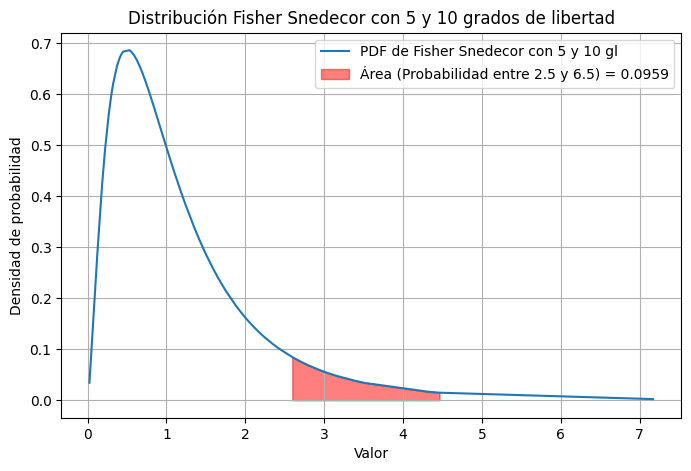

In [75]:
a = 2.5
b = 6.5
f_visualizar_area_Fisher(numeros, gl1, gl2, a, b)

### ¿Cual es la probabilidad de que x sea mayor que 3;  $F(3 \le x \le ∞ )$  a 5 y 10 grados de libertad? Se utiliza la función f_visualizar_area_Fisher()

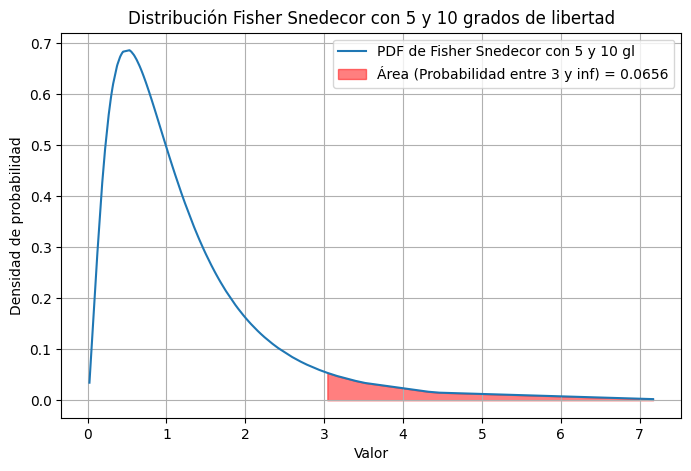

In [76]:
a = 3
b = np.inf
f_visualizar_area_Fisher(numeros, gl1, gl2, a, b)

# Interpretación

En relación con la distribución *F de Fisher Snedecor* se determinaron y se visualizaron densidades; se calcularon probabilidades y se generaron números aleatorios.

* ¿Cuál es la forma de la curva de la densidad de una distribuci´pn *F de Fisher*?
* ¿Con qué distribuciones se relaciona la distribución *F de Fisher?*
* Para qué podría usarse la distribución *F de Fisher*?
* ¿Cómo generar números aleatorios de una distribución *F de Fisher*?
* ¿Cómo calcular la densidad en Python de una distribución *F de Fisher*?
* ¿Cómo calcular la probabilidad acumulada de una distribución *F de Fisher*?
* Cómo calcular el valor esperado y que significa en una distribución de Fisher?
* Cómo calcular la varianza y la desviación estándar y qué significa en una distribución de Fisher?
* La forma de la curva cambia si se modifican los grados de libertad de las muestras ?
* Las probabilidades cambian si se modifican los grados de liberdad de las muestras?




# Bibliografía

* Anderson, D., Sweeney, D., & Williams, T. (2008). Estadística para administración y economía Estadística para administración y economía. 10a. Edición. México, D.F: Cengage Learning Editores,S.A. de C.V.

